In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as pyplot


In [2]:
imgCol = cv2.imread('../Utils/LenaJPEG.jpg')
cv2.imshow('Lenna',imgCol)

imgGame = cv2.imread('../Utils/SetWellen.png')
#cv2.imshow('SetWellen',imgGame)

width_set, height_set, depht_set = imgGame.shape
imgGame = cv2.resize(imgGame, [height_set//3, width_set//3])
cv2.imshow('SetWellenMini', imgGame)

cv2.waitKey(0)
cv2.destroyAllWindows                   #wichtig für bildervorschau

<function destroyAllWindows>

In [3]:
imgGray = cv2.imread('../Utils/LenaJPEG.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Lenna Gray', imgGray)

imgGame_Gray = cv2.imread('../Utils/SetWellen.png', cv2.IMREAD_GRAYSCALE)
imgGame_Gray = cv2.resize(imgGame_Gray, [height_set//3, width_set//3])
cv2.imshow('Game Gray', imgGame_Gray)

cv2.waitKey(0)
cv2.destroyAllWindows
#width_set, height_set, depht_set = imgGame.shape
#imgGameGray = cv2.imread('../Utils/SetWellen.png', cv2.IMREAD_GRAYSCALE)
#imgGameGray = cv2.resize(imgGame, [height_set//3, width_set//3])
#cv2.imshow('Set Gray', imgGameGray)

<function destroyAllWindows>

In [4]:
bit_depth = imgGray.dtype
print('Bit-Tiefe des Bildes: ', bit_depth)

Bit-Tiefe des Bildes:  uint8


In [5]:
def histogram(img):
    height, width = img.shape

    L = pow(2, 8)
    arr = np.zeros(L)
    
    for y in range(height):
        for x in range(width):
            tmp = img[y][x]
            arr[tmp] = arr[tmp] + 1

    return arr

def normHistogram(histo):
    normHist = np.zeros(256)
    height, width = imgGray.shape
    size = height * width


    for i in range(len(normHist)):
        normHist[i] = histo[i]/size
    return normHist

<function matplotlib.pyplot.show(close=None, block=None)>

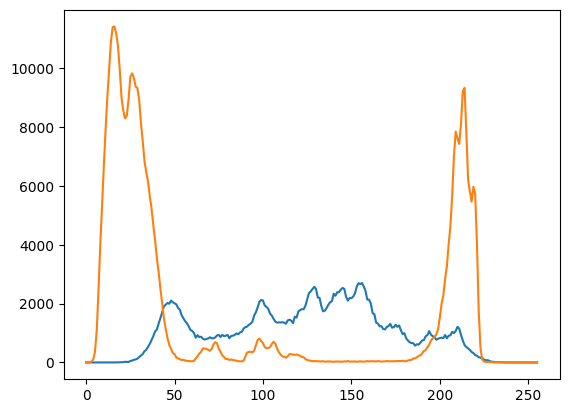

In [6]:
histogram1 = histogram(imgGray)
pyplot.plot(histogram1)
pyplot.show
histGame = histogram(imgGame_Gray)   #Histogram Game Set
pyplot.plot(histGame)
pyplot.show

#pyplot.plot(normHistogram(histogram1))
#pyplot.show

In [7]:
def cumHistogram(histo):
    cumHisto = np.zeros(256)
    for i in range(len(histo)):
        if i == 0:
            cumHisto[i] = histo[i]
        else:
            cumHisto[i] = cumHisto[i-1] + histo[i]
    return cumHisto

<function matplotlib.pyplot.show(close=None, block=None)>

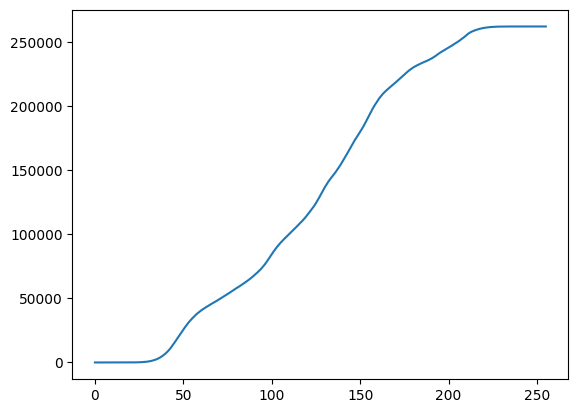

In [9]:
cumHisto = cumHistogram(histogram1)     #Kommuliertes histogram Lenna
pyplot.plot(cumHisto)
pyplot.show

In [10]:
def conStretching(img):
    #Bestimme die Schwellwerte
    p1 = np.percentile(img, 1)
    p99 = np.percentile(img, 99)

    t0 = int(p1)
    t1 = int(p99)
    
    min_val = np.min(img[img>=t0])
    max_val = np.max(img[img<=t1])
    
    out = ((img - min_val) * (255.0 / (t1 - t0))).clip(0, 255).astype(np.uint8)

    return out


In [11]:
newImg = conStretching(imgGray)             #Contrast streched Lenna
cv2.imshow('Lenna gray',imgGray)
cv2.imshow('Lenna contrast streched', newImg)

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [12]:
def calculate_median(hist):       #Medianberechnung
    cumHist = cumHistogram(hist)

    median_gray = np.searchsorted(cumHist, cumHist[-1] / 2)

    return median_gray

<function matplotlib.pyplot.show(close=None, block=None)>

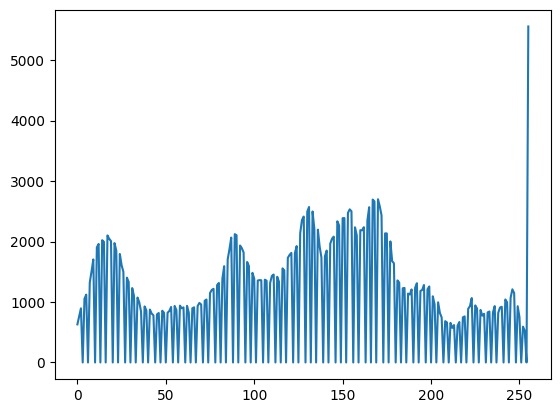

In [13]:
#calculate_median(cumHisto)
histogram2 = histogram(newImg)    #histogram
pyplot.plot(histogram2)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

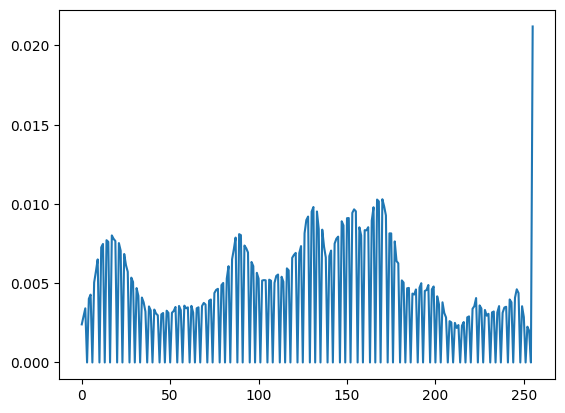

In [14]:
normHistogram2 = normHistogram(histogram2)
pyplot.plot(normHistogram2)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

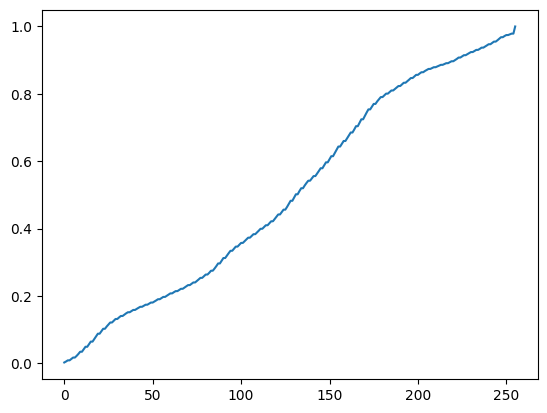

In [15]:
cumHisto2 = cumHistogram(normHistogram2)
pyplot.plot(cumHisto2)
pyplot.show

In [16]:
calculate_median(normHistogram2)

131

<function matplotlib.pyplot.show(close=None, block=None)>

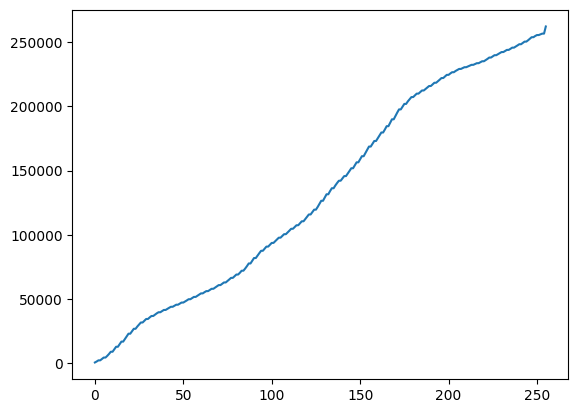

In [17]:
cumHisto3 = cumHistogram(histogram2)
pyplot.plot(cumHisto3)
pyplot.show

In [18]:
medianGray = calculate_median(histogram2)
print(medianGray)

131


In [20]:
def conBinary(img, threshold):
    width, height = img.shape
    result = np.zeros((width, height))

    for y in range(height):
        for x in range(width):
            if img[x, y] < threshold:
                result[x, y] = 0
            else:
                result[x,y] = 255
    
    print(result)
    return result

In [21]:
conBinary(newImg, medianGray)

[[255. 255. 255. ... 255. 255.   0.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


array([[255., 255., 255., ..., 255., 255.,   0.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [22]:
binaryGray = conBinary(newImg, medianGray)
cv2.imshow('Binary Gray' ,binaryGray)
cv2.imshow('Contrast streched Lenna', newImg)

cv2.waitKey(0)
cv2.destroyAllWindows

[[255. 255. 255. ... 255. 255.   0.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


<function destroyAllWindows>

In [23]:
#Aufgabe 1 Übung 3
def otsu (histogram, image):
    #funktioniert die nicht?
    height, width = image.shape
    size = height * width
    hSum = 0
    for i in range(0, len(histogram)-1):
        hSum = hSum + i * histogram[i]


    t = -1
    varMax = -1
    c0 = 0
    sum0 = 0

    for i in range(0, len(histogram)-1):
        c0 = c0 + histogram[i]
        c1 = size - c0
        sum0 = sum0 + i * histogram[i]
        mean0 = sum0/c0
        mean1 = (hSum - sum0)/c1
        varBetween = c0 * c1 * (mean0 - mean1)**2

        if(varMax < varBetween):
            varMax = varBetween
            t = i
        
    
    return t

In [24]:
t_Otsu = otsu(histGame, imgGame_Gray)           #Schwellwert aus Otsu
print(t_Otsu)
binaryGameImg = conBinary(imgGame_Gray, t_Otsu)
cv2.imshow('binary Game with Otsu', binaryGameImg)

cv2.waitKey(0)
cv2.destroyAllWindows

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11652\978510595.py:21: RuntimeWarning: invalid value encountered in scalar divide
  mean1 = (hSum - sum0)/c1


118
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<function destroyAllWindows>

Binarisierung durch erode und dilate verbessern

In [34]:
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(binaryGameImg, kernel, iterations=1)
erosion = cv2.erode(erosion, kernel, iterations=1)
dilationImg = cv2.dilate(erosion, kernel, iterations=1)

cv2.imshow('binary Game with Otsu with erosion, erosion, dilate', dilationImg)

cv2.waitKey(0)
cv2.destroyAllWindows()

Segmentierung in Binärbild

In [27]:
colors = [
  [255, 0, 0],   # Rot
  [0, 255, 0],   # Grün
  [0, 0, 255],   # Blau
  [255, 255, 0], # Gelb
  [255, 0, 255], # Magenta
  [0, 255, 255], # Cyan
  [128, 0, 0],   # Dunkelrot
  [0, 128, 0],   # Dunkelgrün
  [0, 0, 128],   # Dunkelblau
  [128, 128, 0], # Dunkelgelb
  [128, 0, 128], # Dunkelmagenta
  [0, 128, 128], # Dunkelcyan
  [192, 192, 192], # Hellgrau
  #[128, 128, 128], # Grau
  #[255, 255, 255], # Weiß
  #[0, 0, 0],     # Schwarz
  [255, 128, 128], # Hellrot
  [128, 255, 128], # Hellgrün
  [128, 128, 255], # Hellblau
  [255, 255, 128], # Hellgelb
  [255, 128, 255], # Hellmagenta
  [128, 255, 255], # Hellcyan
  [255, 0, 128],   # Pink
  [128, 255, 0],   # Limette
  [0, 128, 255],   # Himmelblau
  [255, 128, 0],   # Orange
  [128, 0, 255],   # Lila
  [0, 255, 128],   # Türkis
  [255, 128, 64],  # Pfirsich
  [64, 255, 128],  # Limonengrün
  [128, 64, 255],  # Violett
]

In [35]:
def floodFill(img, x, y, m):
    stack = []
    duplet = [x, y]
    stack.append(duplet)
    height, width = img.shape

    while (len(stack) != 0):
        tmp = stack.pop()
        x = tmp[0]
        y = tmp[1]
        if ((0<=x<width and 0<=y<height) and img[y][x] == 255):
            print('deine mum')
            img[x][y] = m
            stack.append([x+1, y])
            stack.append([x, y+1])
            stack.append([x, y-1])
            stack.append([x-1, y])
    return img

def segmentation(img):
    m = 2
    
    height, width = img.shape
    result = np.array((width, height))
    for y in range(height):
        for x in range(width):
            if(img[y][x] == 255):
                result = floodfillJohan(img, x, y, m)
                m = m+1
                #print(m, "\t:", colors[m])
    print(m)
    return result

def floodfillJohan(img=[], x=0, y=0, m=1):
    toRet = img
    if len(img.shape) == 3:
        height, width, depth = img.shape
    else :
        height, width = img.shape
    if(x == 0 and y == 0):
        print(height, width)
    S = []
    S.append((x, y))
    
    while len(S) > 0:
        (x, y) = S.pop()
        if((0<=x<width and 0<=y<height) and img[y][x] == 1):
            toRet[y][x] = m
            S.append((x+1, y))
            S.append((x, y+1))
            S.append((x, y-1))
            S.append((x-1, y))
    return toRet


In [36]:
segmentated_Img = segmentation(dilationImg)
cv2.imshow('Segmentated pic', segmentated_Img)

cv2.waitKey(0)
cv2.destroyAllWindows()

122842
